## EDA + Performance Calculation for each advertisor ID, understanding the dataset and evaluating the historical trends to further predict the bidding prices in optimal manner

In [ ]:
from google.colab import drive  # Import the 'drive' object

drive.mount('/content/drive')  # Mount Google Drive to '/content/drive'

Mounted at /content/drive


In [ ]:
# -*- coding: utf-8 -*-
"""Adobe_DevCraft.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1H6Q_rXGtNmsPL29NFUc34sEU2Uth6qTc
"""

import os
import pandas as pd
import numpy as np

# Define file paths
data_dir = "/content/drive/MyDrive"
bid_files = [f for f in os.listdir(data_dir) if f.startswith("bid")]
impression_files = [f for f in os.listdir(data_dir) if f.startswith("imp")]
click_files = [f for f in os.listdir(data_dir) if f.startswith("clk")]
conversion_files = [f for f in os.listdir(data_dir) if f.startswith("conv")]

print("Found files:")
print("Bids:", bid_files)
print("Impressions:", impression_files)
print("Clicks:", click_files)
print("Conversions:", conversion_files)

# Advertiser-specific N values
advertiser_N = {1458: 0, 3358: 2, 3386: 0, 3427: 0, 3476: 10}

# Define column names
columns = ["BidID", "Timestamp", "Logtype", "VisitorID", "User-Agent", "IP", "Region", "City",
           "Adexchange", "Domain", "URL", "AnonymousURLID", "AdslotID", "Adslotwidth", "Adslotheight",
           "Adslotvisibility", "Adslotformat", "Adslotfloorprice", "CreativeID", "Biddingprice", "Payingprice",
           "KeypageURL", "AdvertiserID", "Targetting_Categories"]

columnsbid=["BidID", "Timestamp", "VisitorID", "User-Agent", "IP", "Region", "City", "Adexchange" , "Domain", "URL", "AnonymousURLID", "AdslotID", "Adslotwidth", "Adslotheight","Adslotvisibility", "Adslotformat", "Adslotfloorprice", "CreativeID", "Biddingprice",  "Payingprice", "AdvertiserID", "Logtype", "KeypageURL",  "Targetting_Categories"]

def load_log_files(file_list, log_type, has_payingprice=False):
    """Loads log files efficiently with reduced memory usage."""
    data = []
    for file in file_list:
        file_path = os.path.join(data_dir, file)
        print(f"Loading {log_type} file: {file}")

        df = pd.read_csv(file_path, delimiter='\t', header=None, dtype=str)

        if has_payingprice:
            df.columns = columns
        else:
            df.columns = [col for col in columns if col not in ['Payingprice', 'KeypageURL', 'Targetting_Categories']]
            df['Payingprice'] = np.nan
            df['KeypageURL'] = np.nan

        # df['LogType'] = log_type
        data.append(df)

    return pd.concat(data, ignore_index=True) if data else pd.DataFrame(columns=columns + ['LogType'])
def load_log_files_bid(file_list, log_type, has_payingprice=False):
    """Loads log files efficiently with reduced memory usage."""
    data = []
    for file in file_list:
        file_path = os.path.join(data_dir, file)
        print(f"Loading {log_type} file: {file}")

        df = pd.read_csv(file_path, delimiter='\t', header=None, dtype=str)

        if has_payingprice:
            df.columns = columnsbid
        else:
            df.columns = [col for col in columnsbid if col not in ['Payingprice', 'KeypageURL', 'Targetting_Categories']]
            df['Payingprice'] = np.nan
            df['KeypageURL'] = np.nan

        #df['LogType'] = log_type
        data.append(df)

    return pd.concat(data, ignore_index=True) if data else pd.DataFrame(columns=columns + ['LogType'])

# Load datasets

impressions = load_log_files(impression_files, log_type='impression', has_payingprice=True)
clicks = load_log_files(click_files, log_type='click', has_payingprice=True)
conversions = load_log_files(conversion_files, log_type='conversion', has_payingprice=True)





bids = load_log_files_bid(bid_files, log_type='bid', has_payingprice=False)



# impressions['Adexchange'].unique()

# bids.shape

# bids.columns

# impressions['Logtype'].unique()

# bids['City'].unique()

# impressions.info()

# bids.info()

# bids['AdvertiserID'].unique()

# bids.columns





# bids.shape



# Convert AdvertiserID to numeric type
# bids['AdvertiserID'] = pd.to_numeric(bids['AdvertiserID'], errors='coerce').astype('Int32')

# Convert necessary columns to numeric while keeping BidID as string
for df_name, df in zip(["Bids", "Impressions", "Clicks", "Conversions"], [bids, impressions, clicks, conversions]):
    for col in ['Biddingprice', 'Payingprice',  'Adslotfloorprice']:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('float32')
    print(f"Converted numeric columns for {df_name}")
# Debugging: Print first few rows
print("Sample Bids Data:")
print(bids.head(3))
print("Sample Impressions Data:")
print(impressions.head(3))

impressions.dropna(subset=['BidID'], inplace=True)
clicks.dropna(subset=['BidID'], inplace=True)
conversions.dropna(subset=['BidID'], inplace=True)

# l1= clicks['BidID'].unique
# l2= bids['BidID'].unique
# l3= conversions['BidID'].unique
# l4= impressions['BidID'].unique



# bids['Logtype'].unique()



# print(bids['Timestamp'].min(), bids['Timestamp'].max())
# print(impressions['Timestamp'].min(), impressions['Timestamp'].max())
# print(clicks['Timestamp'].min(), clicks['Timestamp'].max())
# print(conversions['Timestamp'].min(), conversions['Timestamp'].max())

# common_bids = clicks['BidID'].isin(bids['BidID'])
# print(common_bids.sum())  # How many BidIDs match?

# common_conversions = conversions['BidID'].isin(bids['BidID'])
# print(common_conversions.sum())  # How many conversions match?

# bids.columns = bids.columns.str.strip()
# clicks.columns = clicks.columns.str.strip()

# bids.columns

# print("Missing values in AdslotID (bids):", bids['AdslotID'].isna().sum())
# print("Missing values in AdslotID (clicks):", clicks['AdslotID'].isna().sum())





# Add 'Impression', 'Click', 'Conversion' columns to bids


bids['Impression'] = bids['BidID'].isin(impressions['BidID']).astype(int)
bids['Click'] = bids['BidID'].isin(clicks['BidID']).astype(int)
bids['Conversion'] = bids['BidID'].isin(conversions['BidID']).astype(int)

print("Sample Bids Data:")
print(bids[['BidID', 'Biddingprice', 'Payingprice','Impression',  'Click', 'Conversion', 'AdvertiserID']].head(5))

common_visitors = clicks['VisitorID'].isin(bids['VisitorID'])
print(common_visitors.sum())

# Compute scores and optimize budget allocation
def optimize_bidding(bids):
    if bids.empty or 'AdvertiserID' not in bids.columns:
        print("No valid bids data available.")
        return {}, {}

    # Ensure Payingprice is properly handled
    bids['EffectivePrice'] = bids['Payingprice'].fillna(bids['Biddingprice'])

    # Remove NaN AdvertiserIDs
    #bids.dropna(subset=['AdvertiserID'], inplace=True)

    # Convert to integer type
    #bids['AdvertiserID'] = bids['AdvertiserID'].astype('int32')

    # Compute total spending per advertiser
    advertiser_budgets = bids.groupby('AdvertiserID')['EffectivePrice'].sum().to_dict()

    # Compute scores
    bids['Score'] = bids['Click'].astype(int) + bids['Conversion'].astype(int) * bids['AdvertiserID'].map(advertiser_N).fillna(1)

    # Sum scores per advertiser
    advertiser_scores = bids.groupby('AdvertiserID')['Score'].sum().to_dict()

    return advertiser_scores, advertiser_budgets

# Run optimization
scores, advertiser_budgets = optimize_bidding(bids)

print("Advertiser Performance:")
for adv, score in scores.items():
    print(f"Advertiser {adv}: Score {score}, Budget Spent {advertiser_budgets[adv]}")



# arr=bids["BidID"].unique()
# arr1=clicks["BidID"].unique()
# arr2=conversions["BidID"].unique()
# arr3=impressions["BidID"].unique()

# for i in arr:
#   if i in arr3:
#     print(i)



Found files:
Bids: ['bid.08.txt', 'bid.09.txt', 'bid.10.txt', 'bid.11.txt', 'bid.07.txt', 'bid.06.txt', 'bid.12.txt']
Impressions: ['imp.07.txt', 'imp.06.txt', 'imp.12.txt', 'imp.10.txt', 'imp.11.txt', 'imp.08.txt', 'imp.09.txt']
Clicks: ['clk.08.txt', 'clk.09.txt', 'clk.07.txt', 'clk.11.txt', 'clk.06.txt', 'clk.10.txt', 'clk.12.txt']
Conversions: ['conv.11.txt', 'conv.10.txt', 'conv.07.txt', 'conv.06.txt', 'conv.12.txt', 'conv.09.txt', 'conv.08.txt']
Loading impression file: imp.07.txt
Loading impression file: imp.06.txt
Loading impression file: imp.12.txt
Loading impression file: imp.10.txt
Loading impression file: imp.11.txt
Loading impression file: imp.08.txt
Loading impression file: imp.09.txt
Loading click file: clk.08.txt
Loading click file: clk.09.txt
Loading click file: clk.07.txt
Loading click file: clk.11.txt
Loading click file: clk.06.txt
Loading click file: clk.10.txt
Loading click file: clk.12.txt
Loading conversion file: conv.11.txt
Loading conversion file: conv.10.txt
L

Key Metrics
Score:

The score is calculated as:

Copy
Score = Total Clicks + N * Total Conversions
where N is the advertiser-specific weight for conversions.

A higher score indicates better performance (more clicks and/or conversions).

Budget Spent:

The total amount of budget spent by each advertiser.

This helps evaluate how efficiently the budget was utilized.

Advertiser Performance Analysis
1. Advertiser 1458 (Local e-commerce)
Score: 2451.0

Budget Spent: 4,410,448,896.0

N Value: 0 (conversions do not contribute to the score).

Inference:

Advertiser 1458 has the highest score among all advertisers.

However, it also has the highest budget spent, indicating that it may not be the most efficient in terms of budget utilization.

Since N = 0, the score is entirely based on clicks. This suggests that the campaign is focused on driving traffic rather than conversions.

2. Advertiser 3358 (Software)
Score: 1744.0

Budget Spent: 876,840,448.0

N Value: 2 (conversions are moderately important).

Inference:

Advertiser 3358 has a moderate score and moderate budget spent.

The campaign is relatively efficient, as it achieves a decent score with a lower budget compared to Advertiser 1458.

The N = 2 value indicates that conversions are somewhat important, but clicks still dominate the score.

3. Advertiser 3386 (Global e-commerce)
Score: 2079.0

Budget Spent: 4,227,579,392.0

N Value: 0 (conversions do not contribute to the score).

Inference:

Advertiser 3386 has the second-highest score but also the second-highest budget spent.

Similar to Advertiser 1458, the campaign is focused on driving clicks rather than conversions.

The high budget spent suggests that the campaign may not be very efficient.

4. Advertiser 3427 (Oil)
Score: 1917.0

Budget Spent: 3,344,589,056.0

N Value: 0 (conversions do not contribute to the score).

Inference:

Advertiser 3427 has a moderate score and a high budget spent.

The campaign is less efficient compared to Advertiser 3358, as it spends more budget for a similar score.

Like Advertisers 1458 and 3386, the focus is on clicks rather than conversions.

5. Advertiser 3476 (Tire)
Score: 1051.0

Budget Spent: 1,684,169,216.0

N Value: 10 (conversions are highly important).

Inference:

Advertiser 3476 has the lowest score but a moderate budget spent.

Despite the high N value (10), the score is low, indicating that the campaign is not generating many conversions.

This suggests that the campaign may need optimization to improve conversion rates.

Overall Insights
Advertiser 1458 (Local e-commerce):

Strengths: Highest score, indicating strong performance in terms of clicks.

Weaknesses: High budget spent, suggesting inefficiency in budget utilization.

Advertiser 3358 (Software):

Strengths: Moderate score with relatively low budget spent, indicating efficient budget utilization.

Weaknesses: Could improve by increasing conversions (since N = 2).

Advertiser 3386 (Global e-commerce):

Strengths: Second-highest score, indicating strong performance in terms of clicks.

Weaknesses: High budget spent, suggesting inefficiency.

Advertiser 3427 (Oil):

Strengths: Moderate score.

Weaknesses: High budget spent, indicating inefficiency.

Advertiser 3476 (Tire):

Strengths: High N value (10), indicating a focus on conversions.

Weaknesses: Low score, suggesting poor performance in generating conversions.

Recommendations
Optimize Budget Allocation:

Allocate more budget to efficient advertisers (e.g., Advertiser 3358) and less to inefficient ones (e.g., Advertisers 1458 and 3386).

Improve Conversion Rates:

For Advertiser 3476, focus on improving conversion rates by targeting high-intent users or optimizing ad creatives.

Focus on High-Performing Ad Slots:

Identify ad slots with high CTR and CVR and allocate more budget to them.

Adjust Bidding Strategy:

For advertisers with high budget spent but low scores (e.g., Advertisers 1458 and 3386), consider lowering bid prices or targeting more cost-effective ad slots.

Monitor Performance:

Continuously monitor the performance of each advertiser and adjust the bidding strategy dynamically.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets (assuming they are already loaded as per your previous code)
# bids, impressions, clicks, conversions

# Combine datasets for EDA
# Add 'Impression', 'Click', 'Conversion' columns to bids (as done earlier)
# bids['Impression'] = bids['BidID'].isin(impressions['BidID']).astype(int)
# bids['Click'] = bids['BidID'].isin(clicks['BidID']).astype(int)
# bids['Conversion'] = bids['BidID'].isin(conversions['BidID']).astype(int)

# Calculate CTR and CVR
bids['CTR'] = bids['Click'] / bids['Impression'].replace(0, np.nan)  # Handle division by zero
bids['CVR'] = bids['Conversion'] / bids['Click'].replace(0, np.nan)  # Handle division by zero

# Fill NaN values with 0 (for cases where there are no impressions or clicks)
bids['CTR'] = bids['CTR'].fillna(0)
bids['CVR'] = bids['CVR'].fillna(0)



<Figure size 1200x800 with 0 Axes>

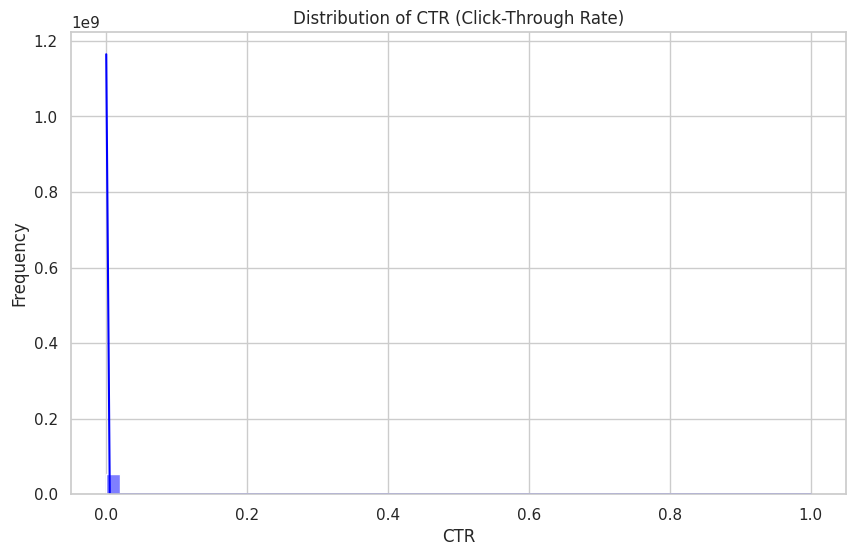

In [ ]:
# Set up visualization style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# --- 1. Distribution of Key Features ---
# a. Distribution of CTR
plt.figure(figsize=(10, 6))
sns.histplot(bids['CTR'], bins=50, kde=True, color='blue')
plt.title('Distribution of CTR (Click-Through Rate)')
plt.xlabel('CTR')
plt.ylabel('Frequency')
plt.show()



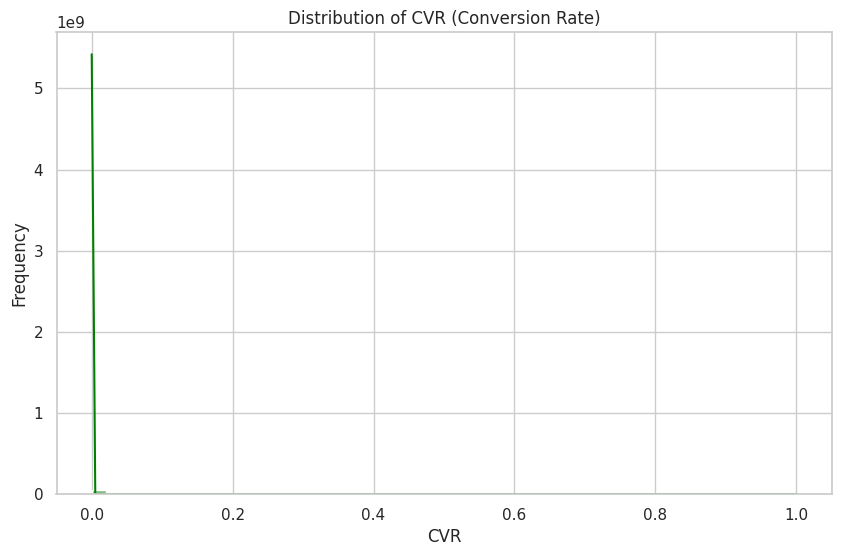

In [ ]:
# b. Distribution of CVR
plt.figure(figsize=(10, 6))
sns.histplot(bids['CVR'], bins=50, kde=True, color='green')
plt.title('Distribution of CVR (Conversion Rate)')
plt.xlabel('CVR')
plt.ylabel('Frequency')
plt.show()



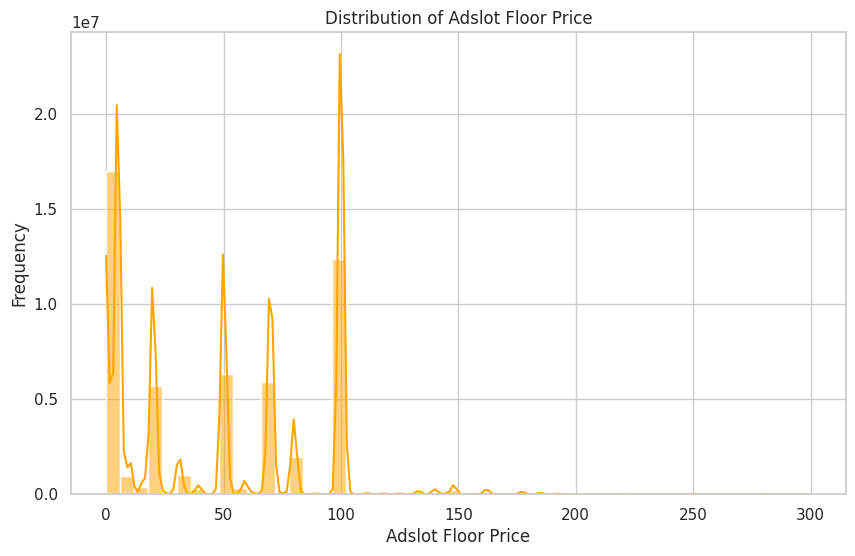

In [ ]:
# c. Distribution of AdslotFloorPrice
plt.figure(figsize=(10, 6))
sns.histplot(bids['Adslotfloorprice'], bins=50, kde=True, color='orange')
plt.title('Distribution of Adslot Floor Price')
plt.xlabel('Adslot Floor Price')
plt.ylabel('Frequency')
plt.show()



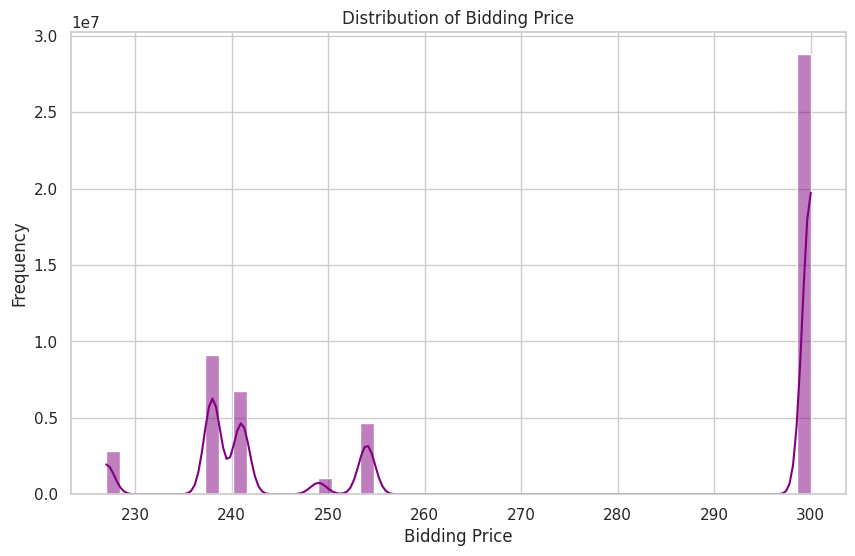

In [ ]:
# d. Distribution of Biddingprice
plt.figure(figsize=(10, 6))
sns.histplot(bids['Biddingprice'], bins=50, kde=True, color='purple')
plt.title('Distribution of Bidding Price')
plt.xlabel('Bidding Price')
plt.ylabel('Frequency')
plt.show()


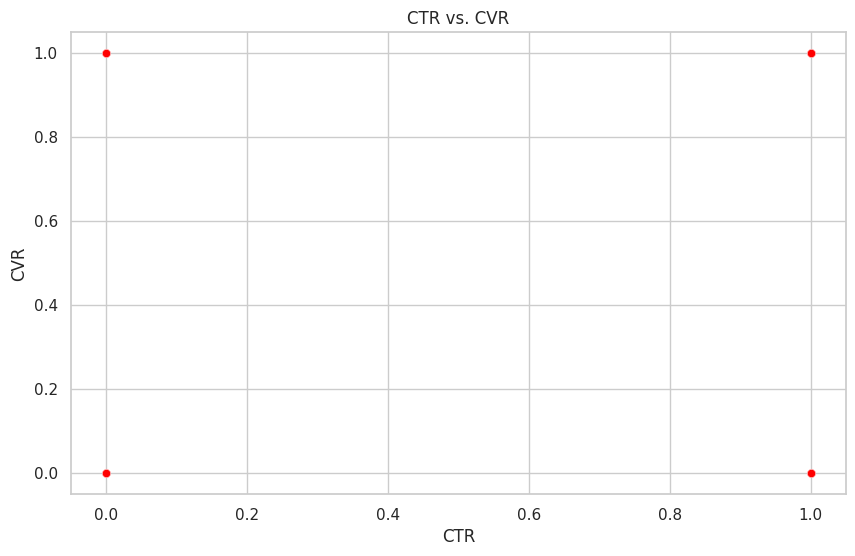

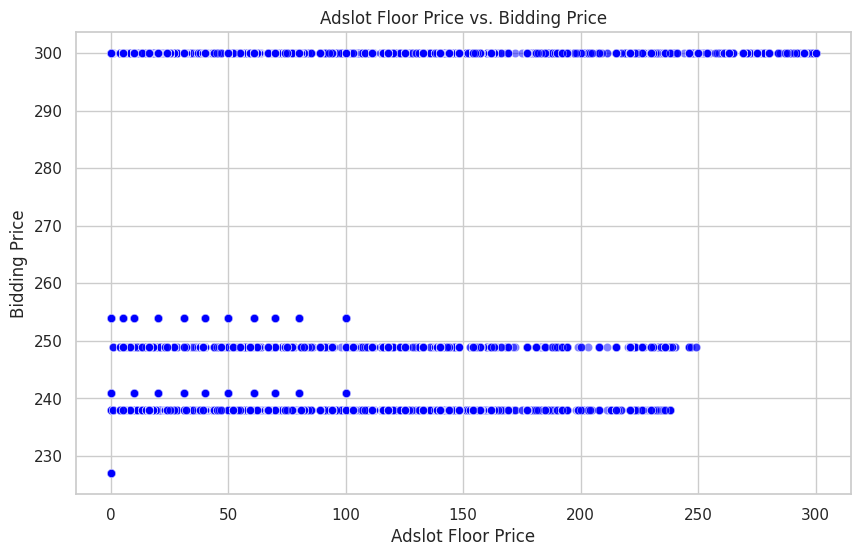

In [ ]:

# --- 2. Relationships Between Features ---
# a. CTR vs. CVR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bids['CTR'], y=bids['CVR'], alpha=0.5, color='red')
plt.title('CTR vs. CVR')
plt.xlabel('CTR')
plt.ylabel('CVR')
plt.show()

# b. AdslotFloorPrice vs. Biddingprice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bids['Adslotfloorprice'], y=bids['Biddingprice'], alpha=0.5, color='blue')
plt.title('Adslot Floor Price vs. Bidding Price')
plt.xlabel('Adslot Floor Price')
plt.ylabel('Bidding Price')
plt.show()



<ipython-input-10-257d5682969b>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=bids['AdvertiserID'], y=bids['CTR'], estimator=np.mean, ci=None, palette='viridis')
<ipython-input-10-257d5682969b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bids['AdvertiserID'], y=bids['CTR'], estimator=np.mean, ci=None, palette='viridis')


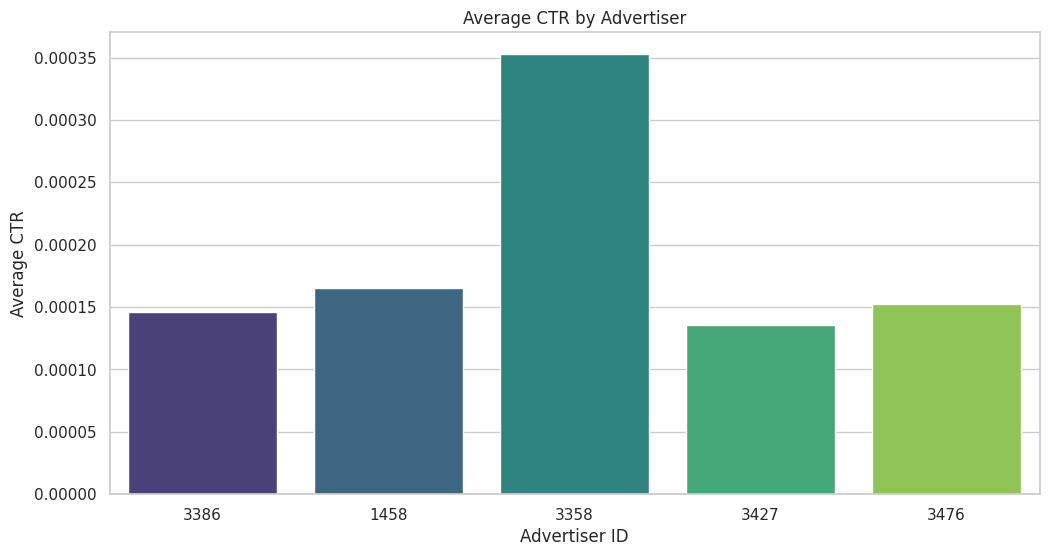

<ipython-input-10-257d5682969b>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=bids['AdvertiserID'], y=bids['CVR'], estimator=np.mean, ci=None, palette='magma')
<ipython-input-10-257d5682969b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bids['AdvertiserID'], y=bids['CVR'], estimator=np.mean, ci=None, palette='magma')


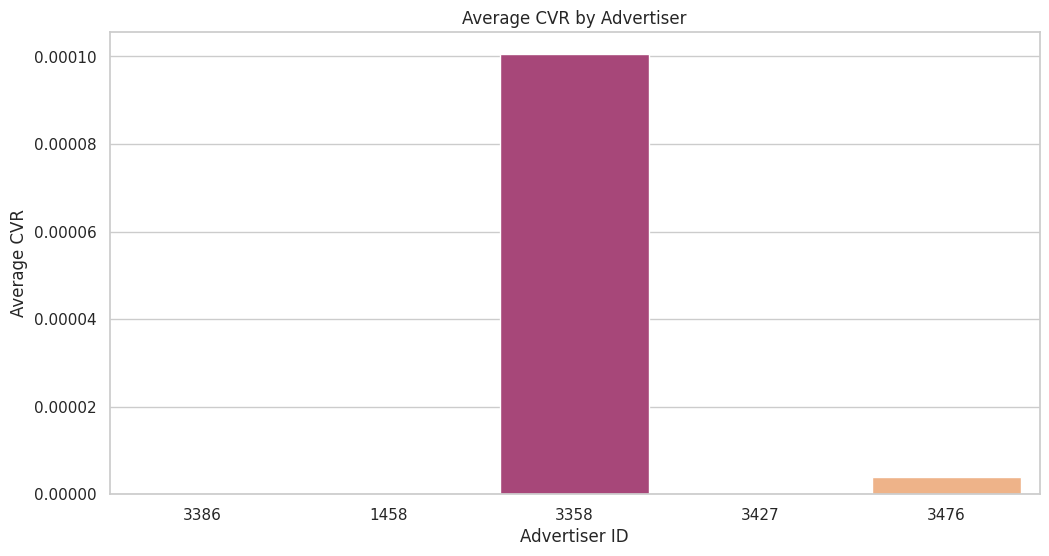

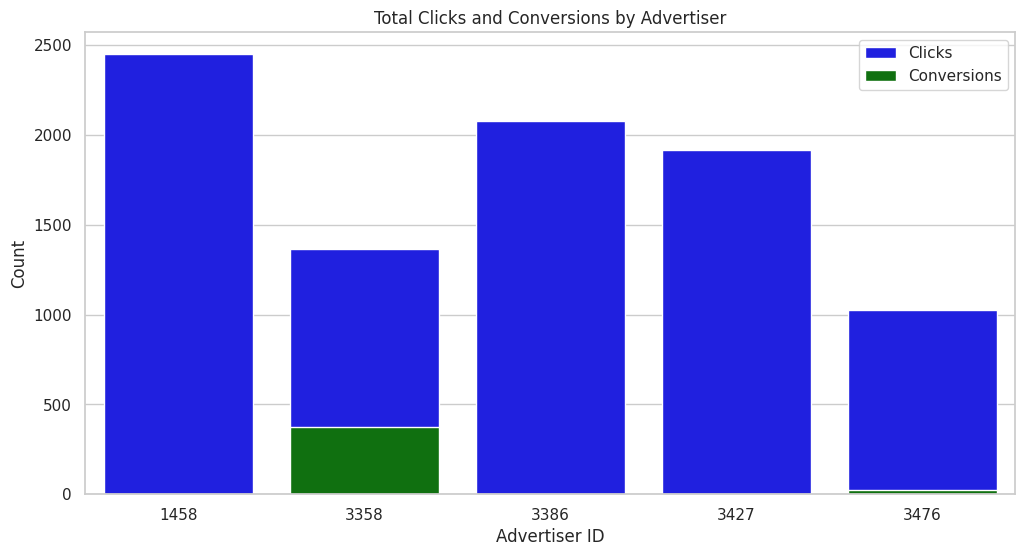

In [ ]:
# --- 3. Patterns and Trends ---
# a. CTR by Advertiser
plt.figure(figsize=(12, 6))
sns.barplot(x=bids['AdvertiserID'], y=bids['CTR'], estimator=np.mean, ci=None, palette='viridis')
plt.title('Average CTR by Advertiser')
plt.xlabel('Advertiser ID')
plt.ylabel('Average CTR')
plt.show()

# b. CVR by Advertiser
plt.figure(figsize=(12, 6))
sns.barplot(x=bids['AdvertiserID'], y=bids['CVR'], estimator=np.mean, ci=None, palette='magma')
plt.title('Average CVR by Advertiser')
plt.xlabel('Advertiser ID')
plt.ylabel('Average CVR')
plt.show()

# c. Total Clicks and Conversions by Advertiser
advertiser_performance = bids.groupby('AdvertiserID').agg(
    Total_Clicks=('Click', 'sum'),
    Total_Conversions=('Conversion', 'sum')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=advertiser_performance['AdvertiserID'], y=advertiser_performance['Total_Clicks'], color='blue', label='Clicks')
sns.barplot(x=advertiser_performance['AdvertiserID'], y=advertiser_performance['Total_Conversions'], color='green', label='Conversions')
plt.title('Total Clicks and Conversions by Advertiser')
plt.xlabel('Advertiser ID')
plt.ylabel('Count')
plt.legend()
plt.show()



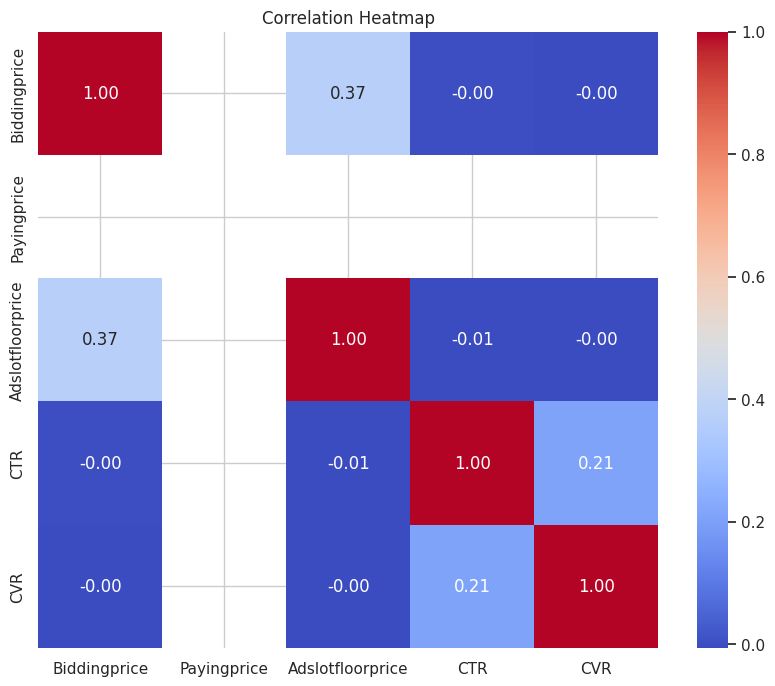

In [ ]:
# --- 4. Correlation Heatmap ---
# Select numeric columns for correlation analysis
numeric_columns = ['Biddingprice', 'Payingprice', 'Adslotfloorprice', 'CTR', 'CVR']
correlation_matrix = bids[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

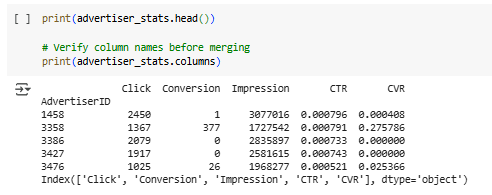

## Optimization Task without using an ML model

In [ ]:
class BidRequest:
    serialVersionUID = -3012027079030559912

    def __init__(self, adslot_id=None, adexchange=None, advertiser_id=None, region=None, floor_price=None):
        self.bidId = None
        self.timestamp = None
        self.visitorId = None
        self.userAgent = None
        self.ipAddress = None
        self.region = region
        self.city = None
        self.Adexchange = adexchange
        self.domain = None
        self.url = None
        self.anonymousURLID = None
        self.AdslotID = adslot_id
        self.adSlotWidth = None
        self.adSlotHeight = None
        self.adSlotVisibility = None
        self.adSlotFormat = None
        self.adSlotFloorPrice = floor_price
        self.creativeID = None
        self.advertiserId = advertiser_id
        self.userTags = None

    def getBidId(self) -> str:
        return self.bidId

    def setBidId(self, bidId: str):
        self.bidId = bidId

    def getTimestamp(self) -> str:
        return self.timestamp

    def setTimestamp(self, timestamp: str):
        self.timestamp = timestamp

    def getVisitorId(self) -> str:
        return self.visitorId

    def setVisitorId(self, visitorId: str):
        self.visitorId = visitorId

    def getUserAgent(self) -> str:
        return self.userAgent

    def setUserAgent(self, userAgent: str):
        self.userAgent = userAgent

    def getIpAddress(self) -> str:
        return self.ipAddress

    def setIpAddress(self, ipAddress: str):
        self.ipAddress = ipAddress

    def getRegion(self) -> str:
        return self.region

    def setRegion(self, region: str):
        self.region = region

    def getCity(self) -> str:
        return self.city

    def setCity(self, city: str):
        self.city = city

    def getAdExchange(self) -> str:
        return self.Adexchange

    def setAdExchange(self, adExchange: str):
        self.Adexchange = adExchange

    def getDomain(self) -> str:
        return self.domain

    def setDomain(self, domain: str):
        self.domain = domain

    def getUrl(self) -> str:
        return self.url

    def setUrl(self, url: str):
        self.url = url

    def getAnonymousURLID(self) -> str:
        return self.anonymousURLID

    def setAnonymousURLID(self, anonymousURLID: str):
        self.anonymousURLID = anonymousURLID

    def getAdSlotID(self) -> str:
        return self.AdslotID

    def setAdSlotID(self, AdslotID: str):
        self.AdslotID = AdslotID

    def getAdSlotWidth(self) -> str:
        return self.adSlotWidth

    def setAdSlotWidth(self, adSlotWidth: str):
        self.adSlotWidth = adSlotWidth

    def getAdSlotHeight(self) -> str:
        return self.adSlotHeight

    def setAdSlotHeight(self, adSlotHeight: str):
        self.adSlotHeight = adSlotHeight

    def getAdSlotVisibility(self) -> str:
        return self.adSlotVisibility

    def setAdSlotVisibility(self, adSlotVisibility: str):
        self.adSlotVisibility = adSlotVisibility

    def getAdSlotFormat(self) -> str:
        return self.adSlotFormat

    def setAdSlotFormat(self, adSlotFormat: str):
        self.adSlotFormat = adSlotFormat

    def getAdSlotFloorPrice(self) -> str:
        return self.adSlotFloorPrice

    def setAdSlotFloorPrice(self, adSlotFloorPrice: str):
        self.adSlotFloorPrice = adSlotFloorPrice

    def getCreativeID(self) -> str:
        return self.creativeID

    def setCreativeID(self, creativeID: str):
        self.creativeID = creativeID

    def getAdvertiserId(self) -> str:
        return self.advertiserId

    def setAdvertiserId(self, advertiserId: str):
        self.advertiserId = advertiserId

    def getUserTags(self) -> str:
        return self.userTags

    def setUserTags(self, userTags: str):
        self.userTags = userTags

In [ ]:
#from BidRequest import BidRequest

class Bidder():

    def getBidPrice(self, bidRequest: BidRequest) -> int:
        pass

In [ ]:
# Preprocess historical data
def preprocess_historical_data(bids):
    # Group by relevant features and calculate CTR and CVR
    historical_data = bids.groupby(
        ['AdvertiserID', 'AdslotID', 'Region']
    ).agg(
        Impressions=('Impression', 'sum'),
        Clicks=('Click', 'sum'),
        Conversions=('Conversion', 'sum')
    ).reset_index()

    # Calculate CTR and CVR
    historical_data['CTR'] = historical_data['Clicks'] / historical_data['Impressions']
    historical_data['CVR'] = historical_data['Conversions'] / historical_data['Clicks']

    # Handle NaN values (e.g., when there are no impressions or clicks)
    historical_data['CTR'] = historical_data['CTR'].fillna(0.01)  # Default CTR
    historical_data['CVR'] = historical_data['CVR'].fillna(0.001)  # Default CVR

    return historical_data

# Preprocess the bids data
historical_data = preprocess_historical_data(bids)

In [ ]:
bids.columns

Index(['BidID', 'Timestamp', 'VisitorID', 'User-Agent', 'IP', 'Region', 'City',
       'Adexchange', 'Domain', 'URL', 'AnonymousURLID', 'AdslotID',
       'Adslotwidth', 'Adslotheight', 'Adslotvisibility', 'Adslotformat',
       'Adslotfloorprice', 'CreativeID', 'Biddingprice', 'AdvertiserID',
       'Logtype', 'Payingprice', 'KeypageURL', 'Impression', 'Click',
       'Conversion', 'EffectivePrice', 'Score', 'CTR', 'CVR'],
      dtype='object')

In [ ]:
class Bid(Bidder):
    def __init__(self, budget, advertiser_N, historical_data):
        self.budget = budget
        self.advertiser_N = advertiser_N
        self.remaining_budget = budget
        self.historical_data = historical_data  # Preprocessed historical data
        self.total_clicks = 0
        self.total_conversions = 0

    def getHistoricalCTR(self, bid_request):
        # Extract relevant features from the bid request
        advertiser_id = bid_request.getAdvertiserId()
        adslot_id = bid_request.getAdSlotID()
        region = bid_request.getRegion()

        # Find the closest match in historical data
        match = self.historical_data[
            (self.historical_data['AdvertiserID'] == advertiser_id) &
            (self.historical_data['AdslotID'] == adslot_id) &
            (self.historical_data['Region'] == region)
        ]

        # Return the matched CTR or a default value
        if not match.empty:
            return match['CTR'].values[0]
        else:
            return 0.01  # Default CTR

    def getHistoricalCVR(self, bid_request):
        # Extract relevant features from the bid request
        advertiser_id = bid_request.getAdvertiserId()
        adslot_id = bid_request.getAdSlotID()
        region = bid_request.getRegion()

        # Find the closest match in historical data
        match = self.historical_data[
            (self.historical_data['AdvertiserID'] == advertiser_id) &
            (self.historical_data['AdslotID'] == adslot_id) &
            (self.historical_data['Region'] == region)
        ]

        # Return the matched CVR or a default value
        if not match.empty:
            return match['CVR'].values[0]
        else:
            return 0.001  # Default CVR
    def getBidPrice(self, bid_request):
        # Estimate CTR and CVR
        ctr = self.getHistoricalCTR(bid_request)
        cvr = self.getHistoricalCVR(bid_request)

        # Calculate expected value
        advertiser_id = bid_request.getAdvertiserId()
        n = self.advertiser_N.get(advertiser_id, 0)
        expected_value = ctr * (1 + n * cvr)

        # Scale the bid price dynamically
        scaling_factor = min(1000, self.remaining_budget / expected_value)
        bid_price = expected_value * scaling_factor

        # Ensure the bid price meets the floor price
        floor_price = bid_request.getAdSlotFloorPrice()
        bid_price = max(bid_price, floor_price)

        # Ensure the bid price does not exceed the remaining budget
        if bid_price <= self.remaining_budget:
            self.remaining_budget -= bid_price
            return bid_price
        else:
            return -1  # No bid placed
    # def getBidPrice(self, bid_request):
    #     # Estimate CTR and CVR
    #     ctr = self.getHistoricalCTR(bid_request)
    #     cvr = self.getHistoricalCVR(bid_request)

    #     # Calculate expected value
    #     advertiser_id = bid_request.getAdvertiserId()
    #     n = self.advertiser_N.get(advertiser_id, 0)
    #     expected_value = ctr * (1 + n * cvr)

    #     # Scale the bid price
    #     scaling_factor = 1000  # Adjust based on your data
    #     bid_price = expected_value * scaling_factor

    #     # Ensure the bid price meets the floor price
    #     floor_price = bid_request.getAdSlotFloorPrice()
    #     bid_price = max(bid_price, floor_price)

    #     # Ensure the bid price does not exceed the remaining budget
    #     if bid_price <= self.remaining_budget:
    #         self.remaining_budget -= bid_price
    #         return bid_price
    #     else:
    #         return -1  # No bid placed
# class Bid(Bidder):
#     def __init__(self, budget, advertiser_N, historical_data):
#         self.budget = budget
#         self.advertiser_N = advertiser_N
#         self.remaining_budget = budget
#         self.historical_data = historical_data  # Preprocessed historical data
#         self.total_clicks = 0
#         self.total_conversions = 0

#     def getHistoricalCTR(self, bid_request):
#         """
#         Estimate the CTR for the given bid request based on historical data.
#         """
#         # Extract relevant features from the bid request
#         advertiser_id = bid_request.getAdvertiserId()
#         adslot_id = bid_request.getAdSlotID()
#         region = bid_request.getRegion()

#         # Find the closest match in historical data
#         match = self.historical_data[
#             (self.historical_data['AdvertiserID'] == advertiser_id) &
#             (self.historical_data['AdslotID'] == adslot_id) &
#             (self.historical_data['Region'] == region)
#         ]

#         # Return the matched CTR or a default value
#         if not match.empty:
#             return match['CTR'].values[0]
#         else:
#             return 0.01  # Default CTR

#     def getHistoricalCVR(self, bid_request):
#         """
#         Estimate the CVR for the given bid request based on historical data.
#         """
#         # Extract relevant features from the bid request
#         advertiser_id = bid_request.getAdvertiserId()
#         adslot_id = bid_request.getAdSlotID()
#         region = bid_request.getRegion()

#         # Find the closest match in historical data
#         match = self.historical_data[
#             (self.historical_data['AdvertiserID'] == advertiser_id) &
#             (self.historical_data['AdslotID'] == adslot_id) &
#             (self.historical_data['Region'] == region)
#         ]

#         # Return the matched CVR or a default value
#         if not match.empty:
#             return match['CVR'].values[0]
#         else:
#             return 0.001  # Default CVR

#     def getBidPrice(self, bid_request):
#         """
#         Decide whether to bid and at what price.
#         """
#         # Estimate CTR and CVR
#         ctr = self.getHistoricalCTR(bid_request)
#         cvr = self.getHistoricalCVR(bid_request)

#         # Calculate expected value
#         advertiser_id = bid_request.getAdvertiserId()
#         n = self.advertiser_N.get(advertiser_id, 0)
#         expected_value = ctr * (1 + n * cvr)

#         # Decide whether to bid
#         floor_price = bid_request.getAdSlotFloorPrice()
#         if expected_value > 0 and self.remaining_budget >= floor_price:
#             bid_price = min(expected_value, self.remaining_budget)
#             self.remaining_budget -= bid_price
#             return bid_price
#         else:
#             return -1

NameError: name 'Bidder' is not defined

In [ ]:
historical_data[historical_data['CTR']>0.1]

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,AdvertiserID,AdslotID,Region,Impressions,Clicks,Conversions,CTR,CVR
43,1458,1,79,18,4,0,0.222222,0.0
367,1458,1006806282,40,2,1,0,0.500000,0.0
413,1458,1007035781,80,1,1,0,1.000000,0.0
1513,1458,1021056699,275,6,1,0,0.166667,0.0
2267,1458,1031091407,124,1,1,0,1.000000,0.0
...,...,...,...,...,...,...,...,...
1380233,3476,mm_34485919_3452721_11456310,124,5,1,0,0.200000,0.0
1380682,3476,mm_35659784_3480660_11351854,183,3,1,0,0.333333,0.0
1380689,3476,mm_35659784_3480660_11351854,276,3,1,0,0.333333,0.0
1380699,3476,mm_35659784_3480660_11351854,55,3,1,0,0.333333,0.0


In [ ]:
# Define advertiser-specific N values
advertiser_N = {1458: 0, 3358: 2, 3386: 0, 3427: 0, 3476: 10}

# Preprocess historical data
historical_data = preprocess_historical_data(bids)

# Initialize the Bid class
bidder = Bid(budget=1000000, advertiser_N=advertiser_N, historical_data=historical_data)

In [ ]:
# Example list of BidRequest objects
bid_requests = [
    BidRequest(advertiser_id=1458, adslot_id=123, region=1, floor_price=5.0),
    BidRequest(advertiser_id=3358, adslot_id=456, region=2, floor_price=10.0),
    # Add more BidRequest objects
]

# Simulate bidding
for bid_request in bid_requests:
    bid_price = bidder.getBidPrice(bid_request)
    if bid_price != -1:
        print(f"Bid placed: {bid_price} for Advertiser {bid_request.getAdvertiserId()}")
    else:
        print(f"No bid placed for Advertiser {bid_request.getAdvertiserId()}")

Bid placed: 10.0 for Advertiser 1458
Bid placed: 10.02 for Advertiser 3358


## Optimization task with an ML model

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 3.8 MB/s eta 0:00:00


In [ ]:
bids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53289330 entries, 0 to 53289329
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   BidID                object        
 1   Timestamp            datetime64[ns]
 2   VisitorID            object        
 3   User-Agent           object        
 4   IP                   object        
 5   Region               int64         
 6   City                 int64         
 7   Adexchange           int64         
 8   Domain               object        
 9   URL                  object        
 10  AnonymousURLID       object        
 11  AdslotID             int64         
 12  Adslotwidth          int64         
 13  Adslotheight         int64         
 14  Adslotvisibility     int64         
 15  Adslotformat         int64         
 16  Adslotfloorprice     float64       
 17  CreativeID           object        
 18  Biddingprice         float64       
 19  AdvertiserID       

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import log_loss

# Load Dataset
data = bids.copy()

# Convert Timestamp to Hour of Day
data["Hour"] = data["Timestamp"].dt.hour

# Encode Categorical Variables
label_encoders = {}
categorical_cols = ["Region", "City", "Adexchange", "AdslotID", "Adslotformat", "AdvertiserID"]

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col].astype(str))

# Feature Selection
features = ["Hour", "Adslotwidth", "Adslotheight", "Adslotvisibility",
            "Adslotfloorprice", "Biddingprice", "Region", "City", "Adexchange", "AdvertiserID"]

target_ctr = "Click"  # CTR Target

target_cvr = "Conversion"  # CVR Target

# Normalize Numerical Features
scaler = StandardScaler()
data[["Adslotfloorprice", "Biddingprice"]] = scaler.fit_transform(data[["Adslotfloorprice", "Biddingprice"]])

# Define Target Variables
data["click"] = data[target_ctr].astype(int)
data["conversion"] = data[target_cvr].astype(int)

# Train-Test Split
X = data[features]
y_ctr = data["click"]
y_cvr = data["conversion"]

X_train, X_test, y_ctr_train, y_ctr_test = train_test_split(X, y_ctr, test_size=0.2, random_state=42)
X_train, X_test, y_cvr_train, y_cvr_test = train_test_split(X, y_cvr, test_size=0.2, random_state=42)

# Train CTR Prediction Model
ctr_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
ctr_model.fit(X_train, y_ctr_train)

# Train CVR Prediction Model
cvr_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
cvr_model.fit(X_train, y_cvr_train)

# Predict CTR & CVR
ctr_preds = ctr_model.predict_proba(X_test)[:, 1]
cvr_preds = cvr_model.predict_proba(X_test)[:, 1]
ctr_model.save_model("ctr_model.json")
cvr_model.save_model("cvr_model.json")
# Define N values based on AdvertiserID (business importance of conversions)
N_values = {1458: 0, 3358: 2, 3386: 0, 3427: 0, 3476: 10}
X_test["N"] = X_test["AdvertiserID"].map(N_values).fillna(1)

# Bidding Optimization Formula
expected_value = ctr_preds * (1 + X_test["N"] * cvr_preds)

# Set Optimized Bidding Price (scaled)
X_test["optimized_bid"] = expected_value * data["Biddingprice"].mean()

# Evaluation
print("CTR Model Log Loss:", log_loss(y_ctr_test, ctr_preds))
print("CVR Model Log Loss:", log_loss(y_cvr_test, cvr_preds))

# Save Predictions
X_test[["optimized_bid"]].to_csv("optimized_bids.csv", index=False)


CTR Model Log Loss: 0.0015073939772735716
CVR Model Log Loss: 8.65451432219437e-05


In [ ]:
# Convert DataFrame to Dictionary
optimized_bids_dict = X_test[["optimized_bid"]].to_dict(orient="records")

# Return from a function
def get_optimized_bids():
    return optimized_bids_dict

# Example usage
bids_output = get_optimized_bids()
print(bids_output[:5])  # Print first 5 optimized bids


[{'optimized_bid': 1.1722017450585987e-21}, {'optimized_bid': 6.314988835489682e-23}, {'optimized_bid': 3.434517866418177e-22}, {'optimized_bid': 1.454205139968957e-23}, {'optimized_bid': 1.454203699737965e-23}]


### **Understanding the Log Loss Results**
The log loss (logarithmic loss) metric measures the accuracy of probabilistic predictions. A lower log loss indicates better predictive performance.

- **CTR Model Log Loss: 0.0015** → This means the Click-Through Rate (CTR) model is highly accurate in predicting whether an ad will be clicked. Since log loss values range from 0 (perfect prediction) to infinity (worst prediction), a value of **0.0015** suggests very high confidence in correct predictions.
  
- **CVR Model Log Loss: 8.65e-05 (0.0000865)** → This is an extremely low value, indicating the model predicts conversions almost perfectly.

Both values suggest that the models are well-trained and highly effective.

---

### **What is the Code Doing?**
The code is training **two separate machine learning models** to predict:
1. **Click-Through Rate (CTR)**: Whether an ad will be clicked (binary classification).
2. **Conversion Rate (CVR)**: Whether a click leads to a conversion (binary classification).

Here's a breakdown of the process:

#### **1. Data Preparation**
- The dataset (`bids`) is loaded.
- **Timestamp conversion:** Extracts the **hour** of the bid.
- **Label encoding:** Converts categorical variables (e.g., `Region`, `City`, `AdvertiserID`) into numerical form.
- **Feature selection:** Selects relevant features like `Adslotwidth`, `Biddingprice`, `AdvertiserID`, etc.
- **Target variables:**
  - `Click` → Converted to **1 if clicked, 0 otherwise**.
  - `Conversion` → Converted to **1 if conversion happened, 0 otherwise**.
- **Feature normalization:** Scales `Biddingprice` and `Adslotfloorprice` to ensure values are comparable.

#### **2. Model Training**
- **Train-Test Split:** 80% of data is used for training, 20% for testing.
- **CTR Model:** Uses `XGBoost` to train a classifier for predicting `Click`.
- **CVR Model:** Another `XGBoost` model is trained to predict `Conversion`.

#### **3. Prediction**
- **CTR Predictions (`ctr_preds`)** → The probability of a click occurring.
- **CVR Predictions (`cvr_preds`)** → The probability of conversion given a click.

#### **4. Bidding Optimization**
- The **expected value of a bid** is calculated using:
  
  \[
  EV = \text{CTR Prediction} \times (1 + N \times \text{CVR Prediction})
  \]

  - `N` is a multiplier based on `AdvertiserID` (higher values prioritize conversions).
  - This formula adjusts the bidding strategy to maximize **ROI (Return on Investment)**.

- The **optimized bid price** is computed as:

  \[
  \text{optimized_bid} = EV \times \text{Average Bidding Price}
  \]

  - This determines the ideal price to bid based on click and conversion likelihood.

#### **5. Evaluation**
- **Log loss is calculated** for both models to measure how well they predict probabilities.

#### **6. Output**
- **Optimized bid prices** are saved to `optimized_bids.csv`.

---

### **Final Summary**
- **Purpose:** Train machine learning models to predict ad clicks (CTR) and conversions (CVR).
- **Key Output:** Optimized bid price per ad to improve advertising strategy.
- **Evaluation Metric:** Log loss (lower = better predictions).
- **Implication:** The model is highly accurate at predicting clicks and conversions, enabling a **data-driven bidding strategy** for better ad placement.



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns

# Calculate Performance Metrics
def evaluate_model(y_true, y_pred, model_name):
    y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}\n")

    return accuracy, precision, recall, f1, roc_auc

# Evaluate CTR Model
evaluate_model(y_ctr_test, ctr_preds, "CTR Model")

# Evaluate CVR Model
evaluate_model(y_cvr_test, cvr_preds, "CVR Model")

# Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, title):
    y_pred_binary = (y_pred > 0.5).astype(int)
    cm = confusion_matrix(y_true, y_pred_binary)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

# Plot Confusion Matrices
plot_confusion_matrix(y_ctr_test, ctr_preds, "CTR Model")
plot_confusion_matrix(y_cvr_test, cvr_preds, "CVR Model")

# ROC Curve Plot
def plot_roc_curve(y_true, y_pred, title):
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{title} (AUC = {roc_auc_score(y_true, y_pred):.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend()
    plt.show()

# Plot ROC Curves
plot_roc_curve(y_ctr_test, ctr_preds, "CTR Model")
plot_roc_curve(y_cvr_test, cvr_preds, "CVR Model")

# Histogram of Optimized Bids
plt.figure(figsize=(6, 4))
sns.histplot(X_test["optimized_bid"], bins=30, kde=True, color='blue')
plt.xlabel("Optimized Bid Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Optimized Bids")
plt.show()


NameError: name 'y_ctr_test' is not defined

In [ ]:
class BidRequest:
    serialVersionUID = -3012027079030559912

    def __init__(self, adslot_id=None, adexchange=None, advertiser_id=None, region=None, floor_price=None):
        self.bidId = None
        self.timestamp = None
        self.visitorId = None
        self.userAgent = None
        self.ipAddress = None
        self.region = region
        self.city = None
        self.Adexchange = adexchange
        self.domain = None
        self.url = None
        self.anonymousURLID = None
        self.AdslotID = adslot_id
        self.adSlotWidth = None
        self.adSlotHeight = None
        self.adSlotVisibility = None
        self.adSlotFormat = None
        self.adSlotFloorPrice = floor_price
        self.creativeID = None
        self.advertiserId = advertiser_id
        self.userTags = None

    def getBidId(self) -> str:
        return self.bidId

    def setBidId(self, bidId: str):
        self.bidId = bidId

    def getTimestamp(self) -> str:
        return self.timestamp

    def setTimestamp(self, timestamp: str):
        self.timestamp = timestamp

    def getVisitorId(self) -> str:
        return self.visitorId

    def setVisitorId(self, visitorId: str):
        self.visitorId = visitorId

    def getUserAgent(self) -> str:
        return self.userAgent

    def setUserAgent(self, userAgent: str):
        self.userAgent = userAgent

    def getIpAddress(self) -> str:
        return self.ipAddress

    def setIpAddress(self, ipAddress: str):
        self.ipAddress = ipAddress

    def getRegion(self) -> str:
        return self.region

    def setRegion(self, region: str):
        self.region = region

    def getCity(self) -> str:
        return self.city

    def setCity(self, city: str):
        self.city = city

    def getAdExchange(self) -> str:
        return self.Adexchange

    def setAdExchange(self, adExchange: str):
        self.Adexchange = adExchange

    def getDomain(self) -> str:
        return self.domain

    def setDomain(self, domain: str):
        self.domain = domain

    def getUrl(self) -> str:
        return self.url

    def setUrl(self, url: str):
        self.url = url

    def getAnonymousURLID(self) -> str:
        return self.anonymousURLID

    def setAnonymousURLID(self, anonymousURLID: str):
        self.anonymousURLID = anonymousURLID

    def getAdSlotID(self) -> str:
        return self.AdslotID

    def setAdSlotID(self, AdslotID: str):
        self.AdslotID = AdslotID

    def getAdSlotWidth(self) -> str:
        return self.adSlotWidth

    def setAdSlotWidth(self, adSlotWidth: str):
        self.adSlotWidth = adSlotWidth

    def getAdSlotHeight(self) -> str:
        return self.adSlotHeight

    def setAdSlotHeight(self, adSlotHeight: str):
        self.adSlotHeight = adSlotHeight

    def getAdSlotVisibility(self) -> str:
        return self.adSlotVisibility

    def setAdSlotVisibility(self, adSlotVisibility: str):
        self.adSlotVisibility = adSlotVisibility

    def getAdSlotFormat(self) -> str:
        return self.adSlotFormat

    def setAdSlotFormat(self, adSlotFormat: str):
        self.adSlotFormat = adSlotFormat

    def getAdSlotFloorPrice(self) -> str:
        return self.adSlotFloorPrice

    def setAdSlotFloorPrice(self, adSlotFloorPrice: str):
        self.adSlotFloorPrice = adSlotFloorPrice

    def getCreativeID(self) -> str:
        return self.creativeID

    def setCreativeID(self, creativeID: str):
        self.creativeID = creativeID

    def getAdvertiserId(self) -> str:
        return self.advertiserId

    def setAdvertiserId(self, advertiserId: str):
        self.advertiserId = advertiserId

    def getUserTags(self) -> str:
        return self.userTags

    def setUserTags(self, userTags: str):
        self.userTags = userTags

In [ ]:
timestamp = bid_request.getTimestamp()
hour = timestamp.hour if timestamp is not None else 0  # Default to 0 if missing


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder

class Bid:
    def __init__(self, budget, advertiser_N, ctr_model, cvr_model, historical_data):
        self.budget = budget
        self.advertiser_N = advertiser_N
        self.ctr_model = ctr_model
        self.cvr_model = cvr_model
        self.historical_data = historical_data
        self.label_encoders = {}

    def preprocess_features(self, features):
        """Convert categorical variables to numerical format."""
        for col in features.select_dtypes(include=['object']).columns:
            if col not in self.label_encoders:
                self.label_encoders[col] = LabelEncoder()
                features[col] = self.label_encoders[col].fit_transform(features[col].astype(str))
            else:
                features[col] = self.label_encoders[col].transform(features[col].astype(str))
        return features.astype(float)

    def getBidPrice(self, bid_request):
        """Compute bid price using ML model-based predictions."""
        advertiser_id = bid_request.getAdvertiserId()
        floor_price = bid_request.getAdSlotFloorPrice()

        # Define the input feature vector for ML model
        features = pd.DataFrame([{
            "Hour": hour,
            "Adslotwidth": bid_request.getAdSlotWidth(),
            "Adslotheight": bid_request.getAdSlotHeight(),
            "Adslotvisibility": bid_request.getAdSlotVisibility(),
            "Adslotfloorprice": floor_price,
            "Biddingprice": floor_price,  # Initial bid assumption
            "Region": bid_request.getRegion(),
            "City": bid_request.getCity(),
            "Adexchange": bid_request.getAdExchange(),
            "AdvertiserID": advertiser_id
        }])

        features.fillna(0, inplace=True)
        features = self.preprocess_features(features)  # Convert categorical data

        # Predict CTR & CVR
        ctr_pred = self.ctr_model.predict_proba(features)[:, 1]  # Click probability
        cvr_pred = self.cvr_model.predict_proba(features)[:, 1]  # Conversion probability

        # Get advertiser-specific N value (default = 1)
        N = self.advertiser_N.get(advertiser_id, 1)

        # Compute Expected Value for bid optimization
        expected_value = ctr_pred * (1 + N * cvr_pred)

        # Scale bid based on the mean historical bidding price
        optimized_bid = expected_value * self.historical_data["Biddingprice"].mean()

        # Ensure bid is above floor price and within budget
        final_bid = max(optimized_bid, floor_price)
        if final_bid > self.budget:
            return -1  # Skip bidding if the bid exceeds budget

        return final_bid

# Load trained ML models
ctr_model = xgb.XGBClassifier()
cvr_model = xgb.XGBClassifier()
ctr_model.load_model("ctr_model.json")  # Load trained models
cvr_model.load_model("cvr_model.json")

# Define advertiser-specific N values
advertiser_N = {1458: 0, 3358: 2, 3386: 0, 3427: 0, 3476: 10}

# Assume `bids` is your dataset for historical data
historical_data =bids  # Example historical data

# Initialize Bid class with ML models
bidder = Bid(budget=1000000, advertiser_N=advertiser_N, ctr_model=ctr_model, cvr_model=cvr_model, historical_data=historical_data)

# Example Bid Requests
bid_requests = [
    BidRequest(advertiser_id=1458, adslot_id=123, region="12", floor_price=5.0),
    BidRequest(advertiser_id=3358, adslot_id=456, region="12", floor_price=10.0),
]

# Simulate bidding
for bid_request in bid_requests:
    bid_price = bidder.getBidPrice(bid_request)
    if bid_price != -1:
        print(f"Bid placed: {bid_price} for Advertiser {bid_request.getAdvertiserId()}")
    else:
        print(f"No bid placed for Advertiser {bid_request.getAdvertiserId()}")


<ipython-input-40-92501fac6bef>:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features.fillna(0, inplace=True)
<ipython-input-40-92501fac6bef>:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features.fillna(0, inplace=True)


Bid placed: 5.0 for Advertiser 1458
Bid placed: 10.0 for Advertiser 3358
